## Q1


In [9]:

import numpy as np
from scipy.optimize import minimize
from scipy import linalg
import matplotlib.pyplot as plt
import cv2 as cv

        
def get_circle(points1, points2, points3):
    temp = points2[0]**2 + points2[1]**2
    bc = (points1[0]**2 + points1[1]**2 - temp)/2
    cd = (temp - points3[0]**2 - points3[1]**2)/2
    det = (points1[0] - points2[0]) * (points2[1] - points3[1]) - (points2[0] - points3[0]) * (points1[1] - points2[1])

    if abs(det) < 1.0e-10:
        return None
    cx = (bc*(points2[1] - points3[1]) - cd*(points1[1] - points2[1]))/ det
    cy = ((points1[0] - points2[0]) * cd - (points2[0] - points3[0])*bc)/ det

    r = ((cx - points1[0])**2 + (cy - points1[1])**2)**0.5

    return cx, cy, r

def short_dis(p,centerx,centery,radius):
    
    return  np.array(abs(((p[:,0]-centerx)**2+(p[:,1]-centery)**2)**0.5-radius))

def RANSAC(Data,iteration,threshold,no_inlier):
    maximum=0
    output=np.array([])

    for i in range(iteration):

        randomPoints=np.random.choice(Data.size//2, size=3, replace=False)
        centerx,centery,radius=get_circle(Data[randomPoints[0]],Data[randomPoints[1]],Data[randomPoints[2]])
        PO=short_dis(Data,centerx,centery,radius)

        if radius>max(Data[:,1])*1.5:
            continue
        inliares=Data[PO<threshold]

        if len(inliares)>no_inlier:
               
            shrt_d=short_dis(inliares,centerx,centery,radius)
            mean = sum(shrt_d/shrt_d.size)
            if maximum < len(inliares):
               
                best=mean
                output=randomPoints
                inli=inliares
            elif maximum == len(inliares) and best>mean:
                best=mean
                output=randomPoints
                inli=inliares
    print("Radius",radius)
    return output,inli

def plot_circle(Data,Datalst,color='r'):
    centerx,centery,radius=get_circle(Datalst[Data[0]],Datalst[Data[1]],Datalst[Data[2]])
    c=plt.Circle((centerx,centery),radius,fill=False)
    c.set_color(color)
    return c





Radius 31.185148546778237
Radius 9.74798691516987


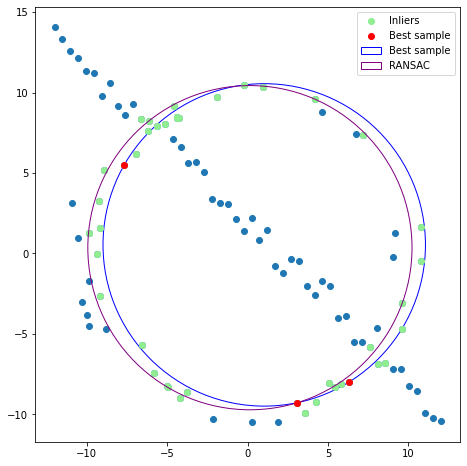

In [10]:
N = 100
N_half = N//2
r = 10
s = r/16
t = np.random.uniform(0, 2*np.pi, N_half)
n = s*np.random.randn(N_half)
x, y = (r+n)*np.cos(t), (r+n)*np.sin(t)
X_circ = np.hstack((x.reshape(N_half, 1), y.reshape(N_half, 1)))
m, b = -1, 2
x = np.linspace(-12, 12, N_half)
y = m*x +b + s*np.random.randn(N_half)
X_line = np.hstack((x.reshape(N_half, 1), y.reshape(N_half, 1)))
X = np.vstack((X_circ, X_line))



randL,bestInlier=RANSAC(X,500,1,40)          
circle1=plot_circle(randL,X, color = 'blue')
fig,ax=plt.subplots(figsize=(8,8))
ax.set_aspect( 1 )
ax.add_artist( circle1 )
p1=ax.scatter(X[:,0],X[:,1])
Inliers=ax.scatter(bestInlier[:,0],bestInlier[:,1], color='lightgreen' )
bestfit,inl=RANSAC(bestInlier,50,1,bestInlier.size//2.2)
circle2=plot_circle(bestfit,bestInlier, color ='purple')
ax.add_artist( circle2 )
Y=np.vstack((X[randL[0]],X[randL[1]],X[randL[2]]))
bestSamples=ax.scatter(Y[:,0],Y[:,1], c = 'r')
plt.legend(handles=[Inliers,bestSamples,circle1,circle2],labels=['Inliers','Best sample','Best sample','RANSAC'])
plt.show()
